<a href="https://colab.research.google.com/github/PatrickRuan/ML100Days/blob/master/1129EDA%E9%81%8E%E9%97%9C%E7%B7%B4%E7%BF%921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【練習 1: None, 建立一個 DataFrame(I)】
# 建立一個 DataFrame hint: Dict*

In [ ]:
import pandas as pd
dict_ = {'key1':[1, 2, 3], 'key2':["a", 2, 3], 'key3': [4, 5, 6]}
df1 = pd.DataFrame(dict_, columns = ['key1', 'key2', 'key3'])
print(df1.info())
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    3 non-null      int64 
 1   key2    3 non-null      object
 2   key3    3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None


,key1,key2,key3
0,1,a,4
1,2,2,5
2,3,3,6


# 【練習 2: None, 建立一個 DataFrame(II)】 
# 建立一個 DataFrame
- data: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt
- hint and further study:
  - !wget
  - !curl -0 (?)
  - requests.get().txt




1129

In [ ]:
!wget 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'
with open('imagenet_urls_examples.txt', 'r') as f:
  data = f.readlines()


--2020-11-29 05:05:51--  https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 784663 (766K) [text/plain]
Saving to: ‘imagenet_urls_examples.txt’

imagenet_urls_examp 100%[===================>] 766.27K  --.-KB/s    in 0.06s   

2020-11-29 05:05:52 (12.6 MB/s) - ‘imagenet_urls_examples.txt’ saved [784663/784663]



In [ ]:
ls_data = []
for i in data:
  a = i.split()
  ls_data.append(a)
df_2 = pd.DataFrame(ls_data)
df_2 = df_2[[0, 1]]
df_2.columns = ['0','1']
df_2.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


1127

In [ ]:
!wget "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
with open('imagenet_urls_examples.txt', 'r') as f:
  data = f.readlines()
ls_data = []
for i in range(len(data)):
  sps = data[i].split('\t')
  sps[1] = sps[1][:-1]
  ls_data.append(sps)
ls_data

In [ ]:
df_url = pd.DataFrame(ls_data) #, columns=['no.', 'url'])
df_url.columns = ['no.', 'url']
df_url.url[0]

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

# 【練習 3: None, 讀取欄位中的圖檔】
# 銜接上一題，讀取欄位中的圖檔




1129

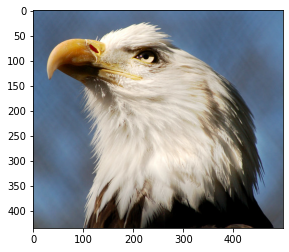

In [ ]:
from PIL import Image
from io import BytesIO
import requests
import matplotlib.pyplot as plt


tt_b = requests.get(df_2['1'][0]).content
img = Image.open(BytesIO(tt_b))
plt.imshow(img)

1127

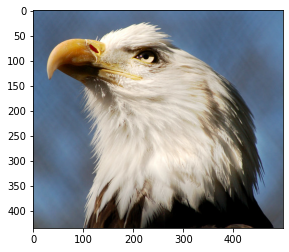

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
tt = requests.get(df_url.url[0])
tt.content
img = Image.open(BytesIO(tt.content))
plt.imshow(img)

# 【練習 4: application_train: EDA 進行基本觀察】
# 利用 "application_train.csv" 進行基本觀察



1129

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
!cp -r drive/'My Drive'/學習/Cupoy/ML100_5/d004_data/ .

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
cp: cannot open 'drive/My Drive/學習/Cupoy/ML100_5/d004_data/HomeCredit_columns_description.gsheet' for reading: Operation not supported


In [ ]:
import os
os.chdir('/content/d004_data')
df_app = pd.read_csv('application_train.csv')
print(df_app.head(3))
print(df_app.info())
print(df_app.describe())
print(df_app.dtypes.head())
print(df_app.shape)

   SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0

[3 rows x 122 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
          SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  ...               265992.000000
mean   278180.518577  ...                    1.899974
std    102790.175348  ...                    1.869295
min    100002.000000  ...                    0.000000
25%    189145.500000  ...                    0.000000
50%    278202.000000  ...                    1.000000
75%    367142.500000  ...                    3.000000
max    4562

1127

In [ ]:
os.chdir('./d004_data')
df_app = pd.read_csv('application_train.csv')
print(df_app.shape)
df_app.head(3)

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_app.describe() 
# .head() is with 307511*122, .describe() is with 8*106
# it implies 16 'object' attributes?

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [ ]:
df_app.info() # yes, we have 16 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df_app.TARGET.unique()
df_app.dtypes # 會列出所有 columns' data type會列出所有 columns' data type
df_app.dtypes.count() # 81 會計數有多少個 data types (其實是指 columns)
df_app.dtypes.value_counts() # 這樣才會根據不同的 datatype 去算數量

float64    65
int64      41
object     16
dtype: int64

# 【練習 5: application, 分開資料類別】
# 利用 "application_train.csv" 完成三個 list，分別裝有 float64, int64, object 三組 columns

1129

In [ ]:
ls_fc1, ls_ic1, ls_os1, ls_nc1 = [], [], [], []
for c, t in zip(df_app.columns, df_app.dtypes):
  if t == 'object':
    ls_os1.append(c)
  else: ls_nc1.append(c)
len(ls_os1), len(ls_nc1)

(16, 106)

1127

In [ ]:
ls_fc = []
ls_ic = []
ls_oc = []
for i in df_app.columns:
  if df_app[i].dtype == 'float64':
    ls_fc.append(i)
  elif df_app[i].dtype == 'int64':
    ls_ic.append(i)
  else: 
    ls_oc.append(i)
ls_nc1 = ls_fc + ls_ic

print(len(ls_fc), len(ls_ic), len(ls_oc), len(ls_nc1), '\n', ls_oc)

65 41 16 106 
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


# 【練習 6: application: 類別資料編碼】 
對 application_train.csv 進行 encoding
- hint: from sklearn.preprocessing import LabelEncoder
- hint: pd.get_dummies

1129

In [ ]:
from sklearn.preprocessing import LabelEncoder
from copy import copy
LBE = LabelEncoder()
df_app_lbe = copy(df_app)
for i in df_app_lbe[ls_os1].columns:
  if len(list(df_app_lbe[i].unique())) <=2:
    print(i)
  #if df_app_lbe[i].nunique()<=2:
    LBE.fit(df_app_lbe[i])
    df_app_lbe[i] = LBE.transform(df_app_lbe[i])
print(df_app['FLAG_OWN_CAR'].head())
df_app_lbe['FLAG_OWN_CAR'].head()

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
0    N
1    N
2    Y
3    N
4    N
Name: FLAG_OWN_CAR, dtype: object


0    0
1    0
2    1
3    0
4    0
Name: FLAG_OWN_CAR, dtype: int64

1127

In [ ]:
from copy import copy
from sklearn.preprocessing import LabelEncoder
LBE = LabelEncoder()

In [ ]:
app_encod = copy(df_app)
c=0
for i in app_encod[ls_oc]:
  if len(list(app_encod[i].unique())) <=2:
    LBE.fit(app_encod[i])
    app_encod[i] = LBE.transform(app_encod[i])
    c+=1
    print(c, i)
    # at project, we should do same proecess at test data

1 NAME_CONTRACT_TYPE
2 FLAG_OWN_CAR
3 FLAG_OWN_REALTY


In [ ]:
app_encod = pd.get_dummies(app_encod)
print(app_encod['CODE_GENDER_F'].head(2))
print(app_encod['CODE_GENDER_M'].head(2))
print(app_encod['NAME_EDUCATION_TYPE_Academic degree'].head(2))
print(f'\n\napp_train.shape, {app_encod.shape}\n\n')
app_encod.head(2)

0    0
1    1
Name: CODE_GENDER_F, dtype: uint8
0    1
1    0
Name: CODE_GENDER_M, dtype: uint8
0    0
1    0
Name: NAME_EDUCATION_TYPE_Academic degree, dtype: uint8


app_train.shape, (307511, 243)




,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


# 【練習 7: application 進行資料觀察與基本統計資訊觀察】
# 利用 application_train.csv 或 boston housing 進行資料觀察與基本統計資訊觀察

In [ ]:
import os
os.chdir('/content/')
!cp -r drive/'My Drive'/學習/Cupoy/ML100_5/d007_data/ .
os.chdir('./d007_data')
df_house_tr = pd.read_csv('house_train.csv.gz')
df_house_tt = pd.read_csv('house_test.csv.gz')

In [ ]:
df_house_tr.shape
df_house_tr.info()
df_house_tr.describe()
df_house_tr.head(3)

In [ ]:
ls_nc2, ls_oc2, ls_fc2, ls_ic2 = [], [], [], []

for c,t in zip(df_house_tr.columns, df_house_tr.dtypes):
  if (t == 'float64') or (t == 'int64'):
    ls_nc2.append(c)
  else: ls_oc2.append(c)
print(f'We have {len(ls_nc2)} numeric columns\n')
print(df_house_tr[ls_nc2].min().head(3))
print(df_house_tr[ls_nc2].quantile(.25).head(3), '\n')
print(df_house_tr[ls_nc2].quantile().head(3), '\n')
print(df_house_tr[ls_nc2].quantile(.75).head(3), '\n')
print(df_house_tr[ls_nc2].max().head(3), '\n')
print(df_house_tr[ls_nc2].mean().head(3), '\n')
print(df_house_tr[ls_nc2].std().head(3), '\n')

We have 38 numeric columns

Id              1.0
MSSubClass     20.0
LotFrontage    21.0
dtype: float64
Id             365.75
MSSubClass      20.00
LotFrontage     59.00
Name: 0.25, dtype: float64 

Id             730.5
MSSubClass      50.0
LotFrontage     69.0
Name: 0.5, dtype: float64 

Id             1095.25
MSSubClass       70.00
LotFrontage      80.00
Name: 0.75, dtype: float64 

Id             1460.0
MSSubClass      190.0
LotFrontage     313.0
dtype: float64 

Id             730.500000
MSSubClass      56.897260
LotFrontage     70.049958
dtype: float64 

Id             421.610009
MSSubClass      42.300571
LotFrontage     24.284752
dtype: float64 



# 【練習 8: application 進行 hist 觀察】
# 利用 application_train.csv 或 boston housing 進行資料進行 hist 觀察

1129

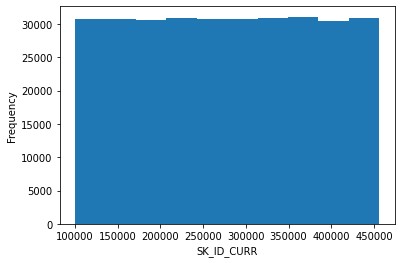

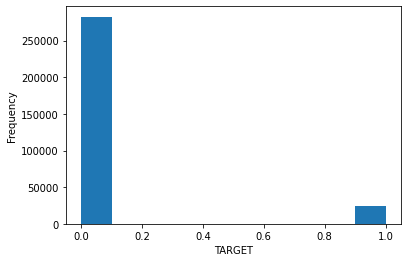

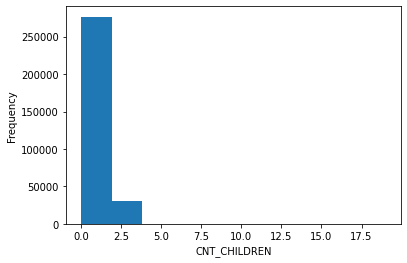

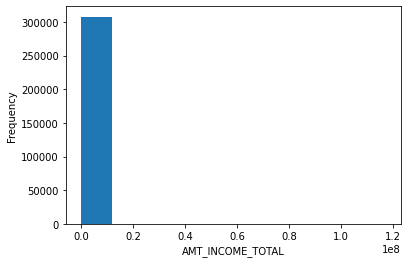

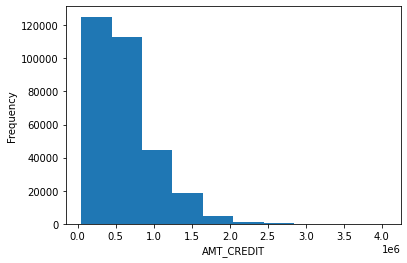

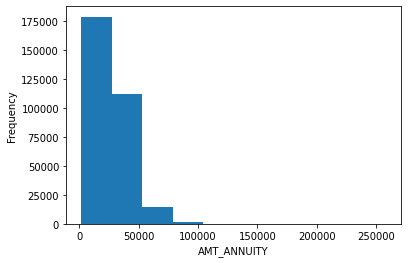

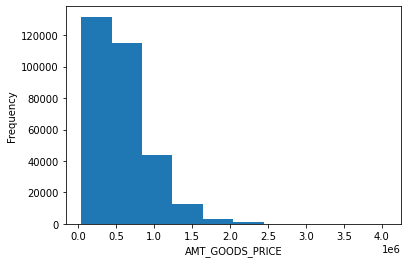

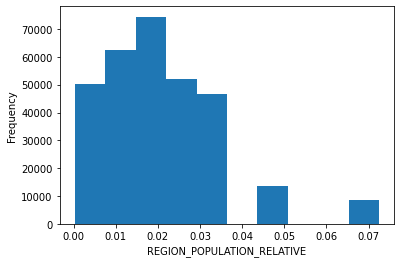

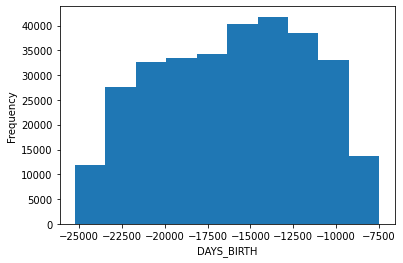

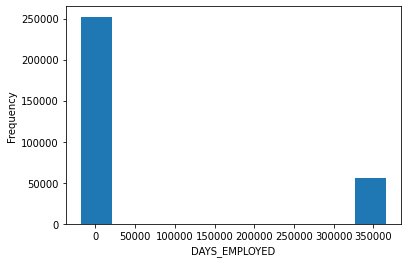

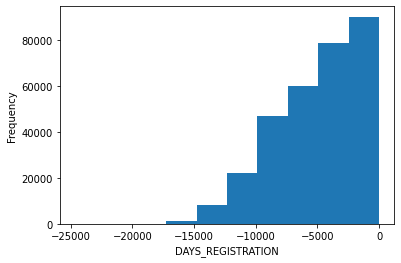

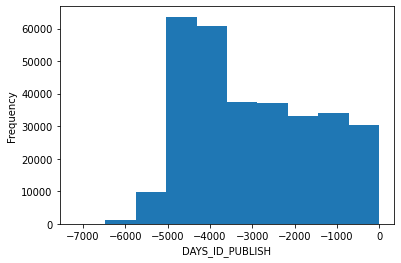

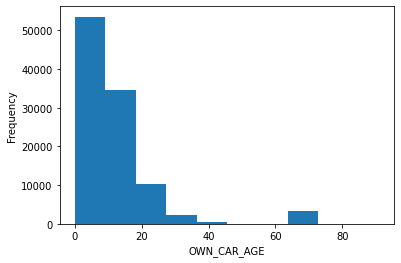

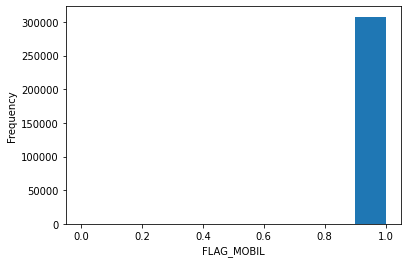

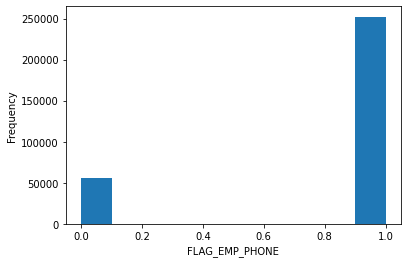

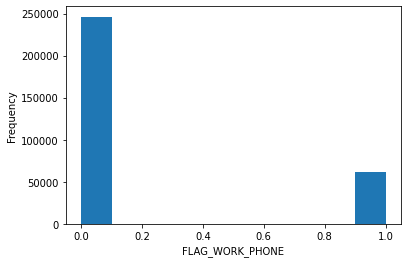

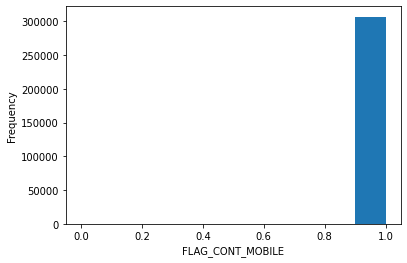

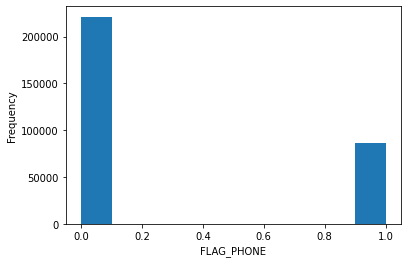

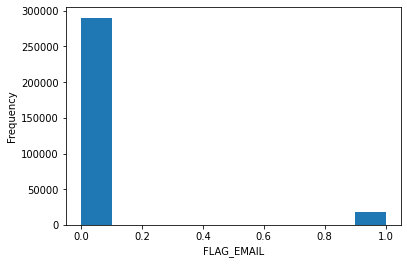

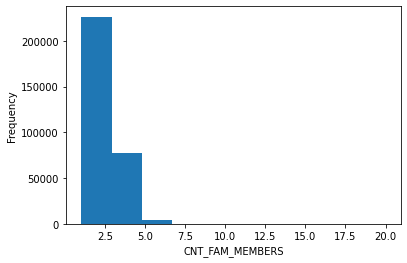

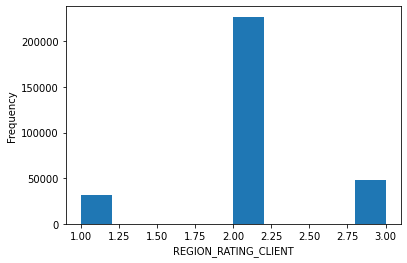

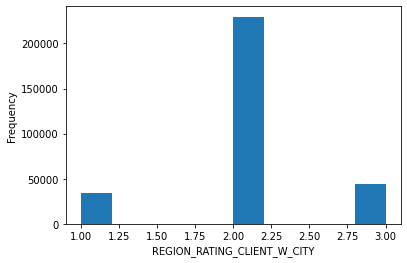

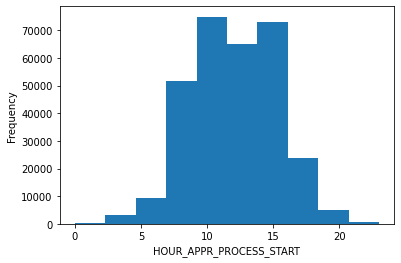

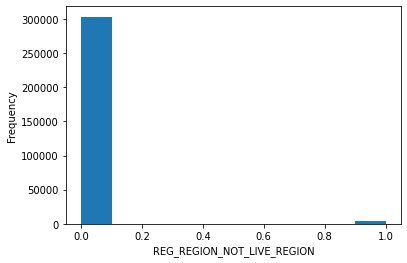

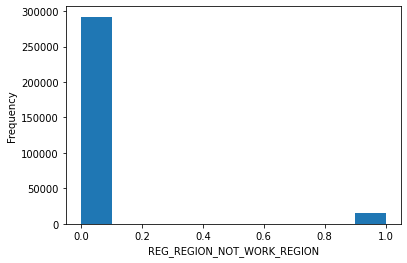

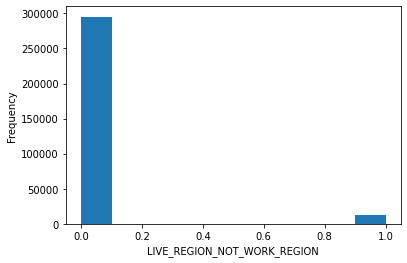

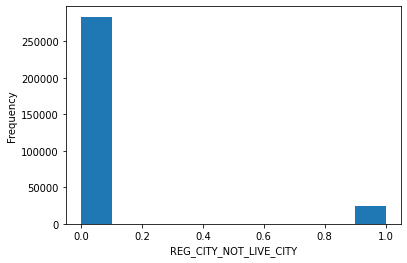

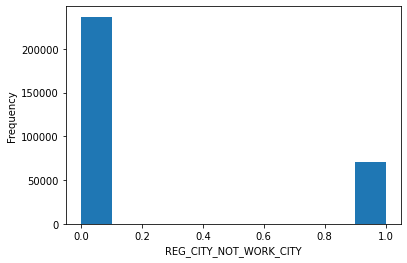

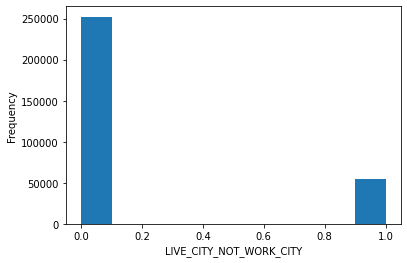

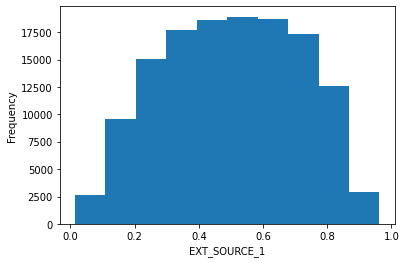

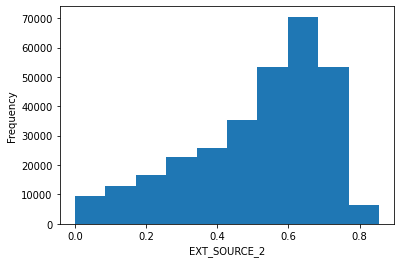

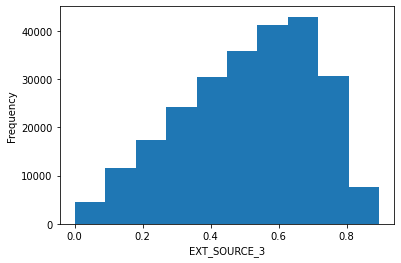

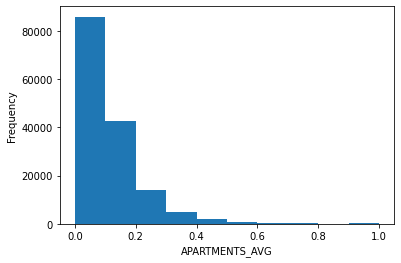

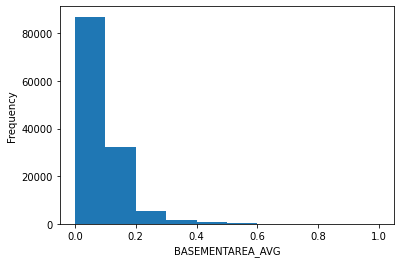

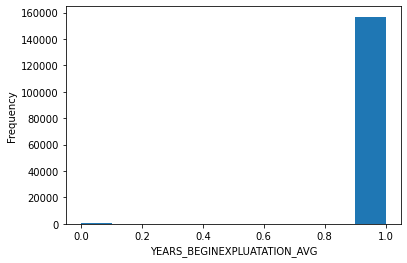

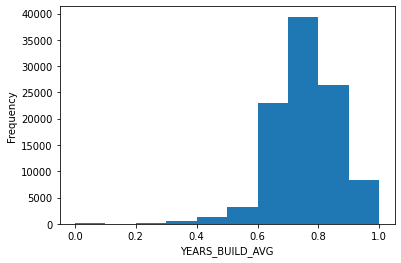

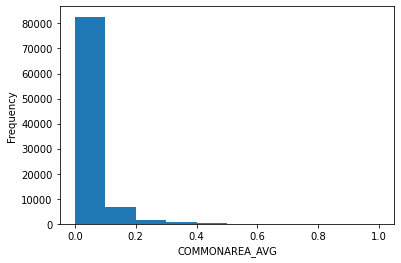

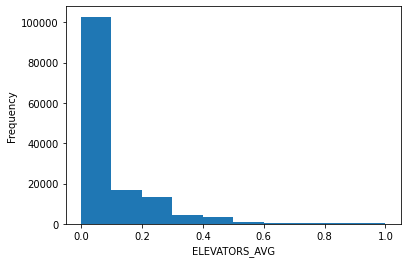

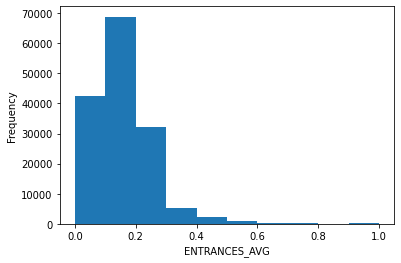

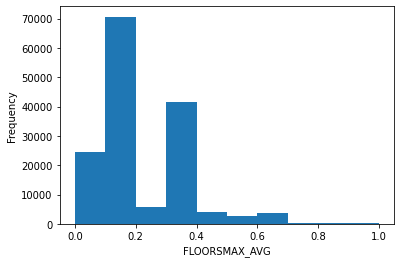

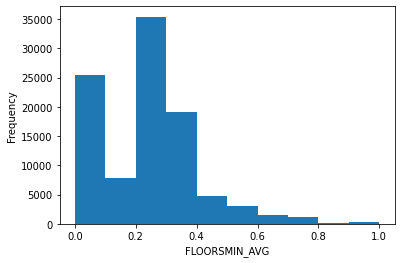

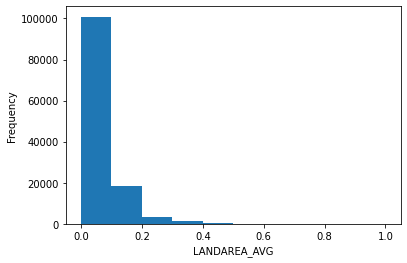

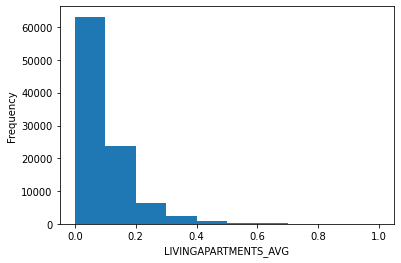

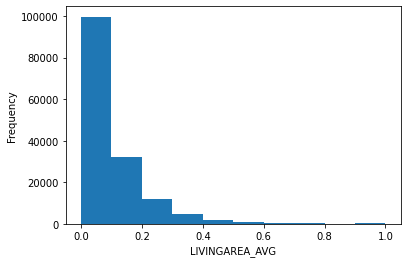

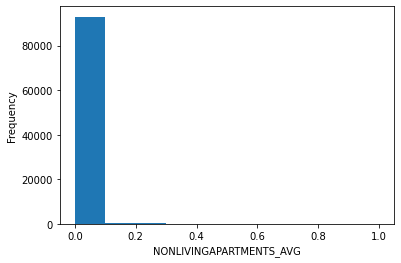

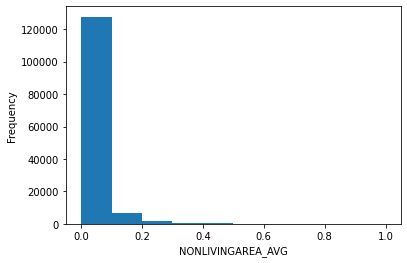

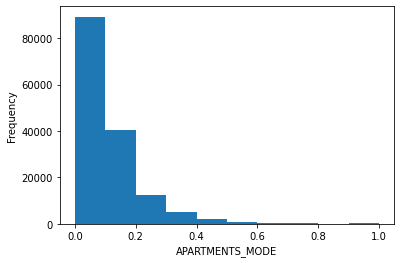

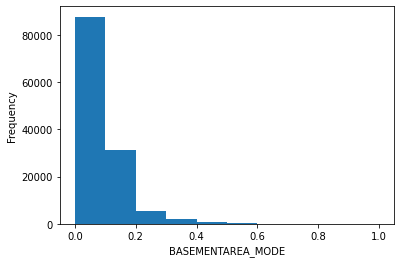

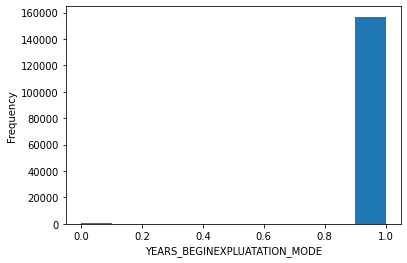

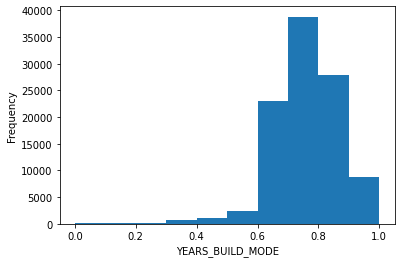

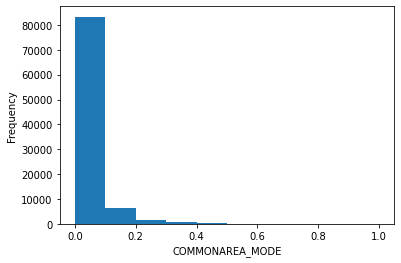

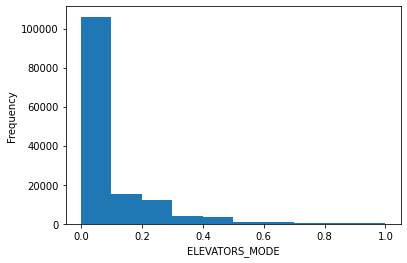

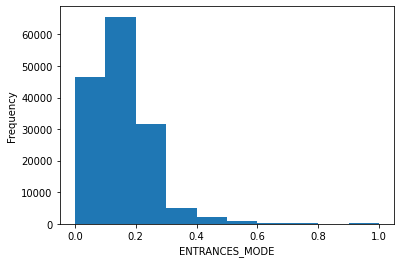

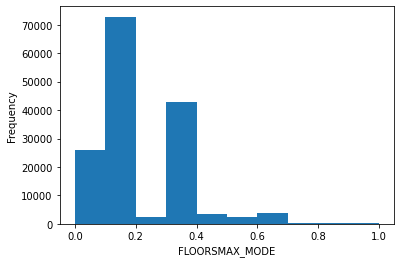

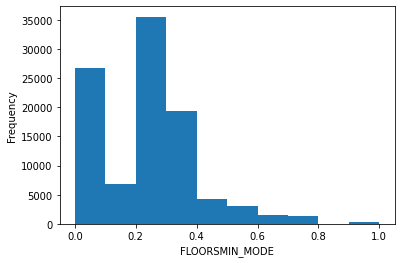

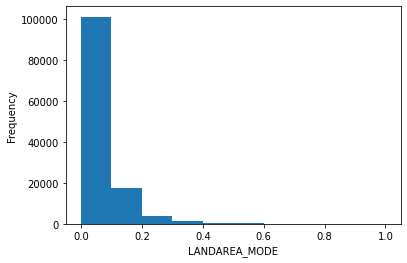

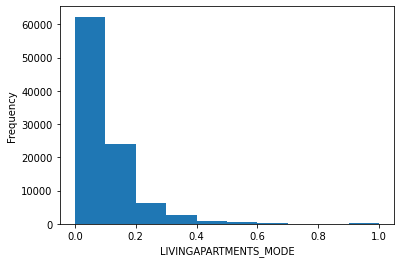

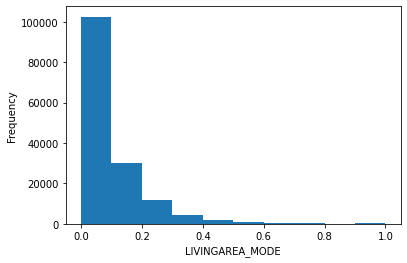

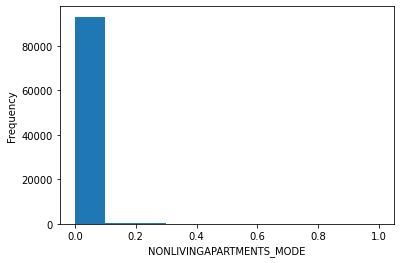

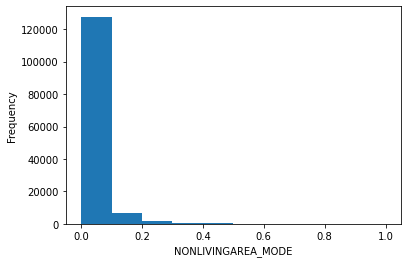

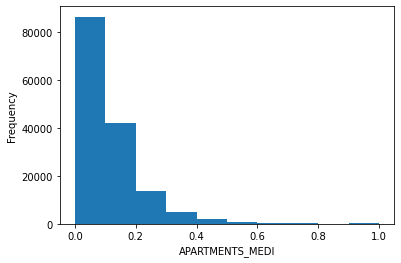

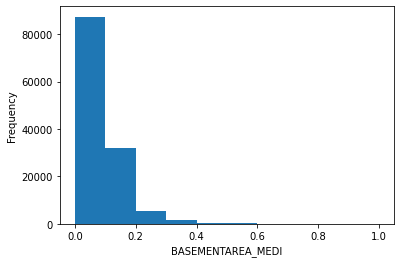

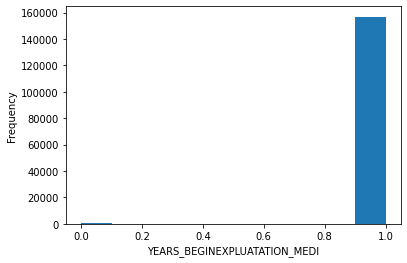

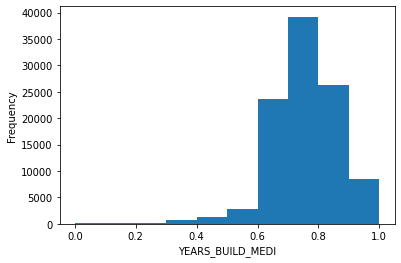

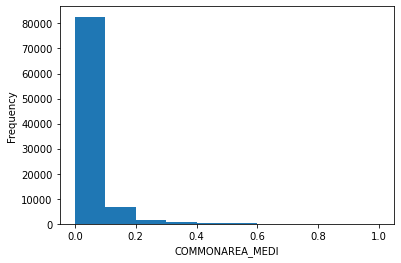

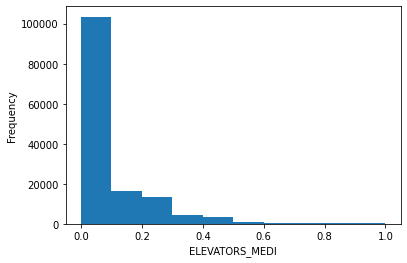

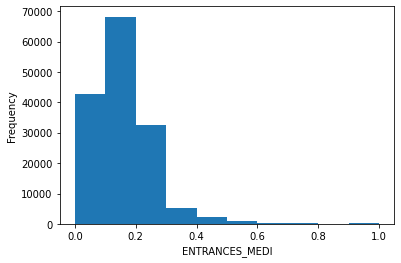

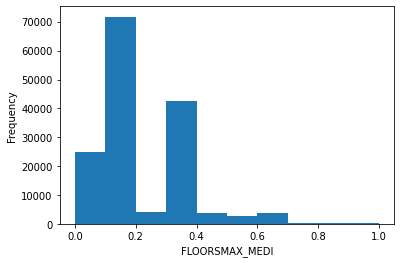

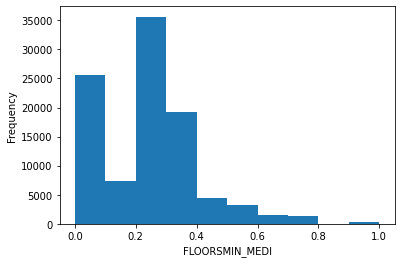

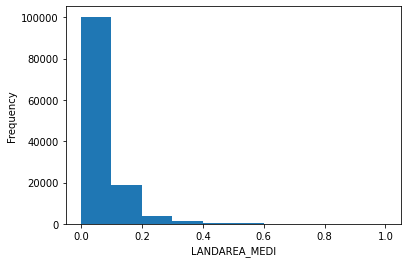

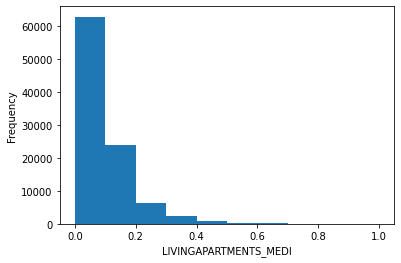

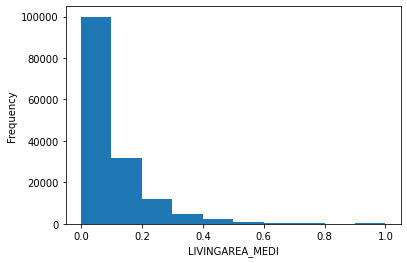

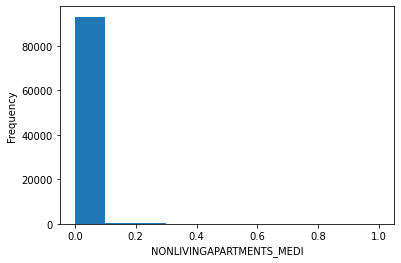

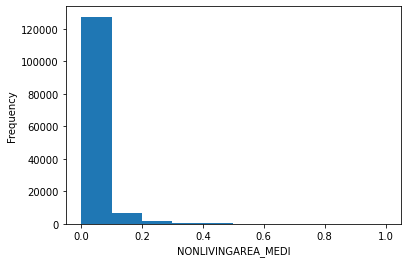

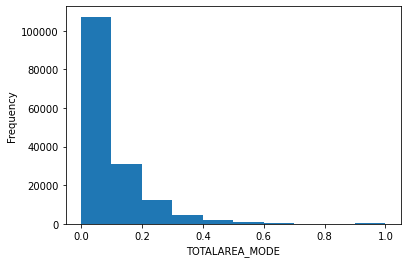

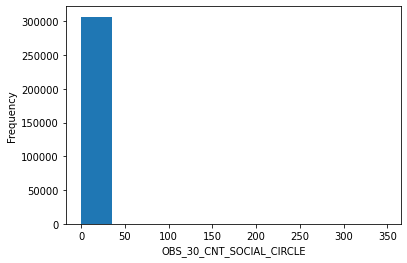

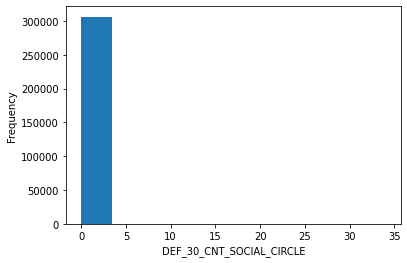

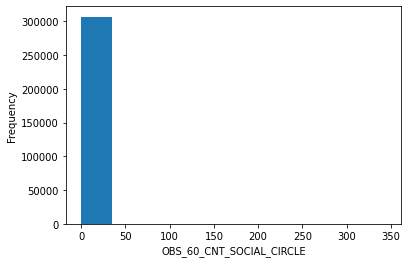

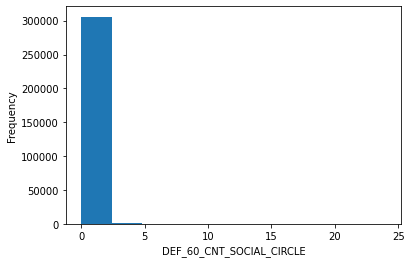

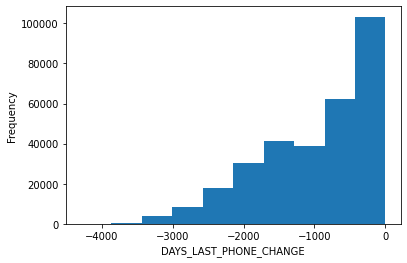

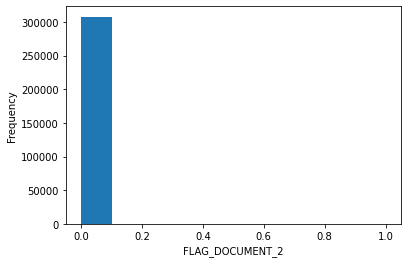

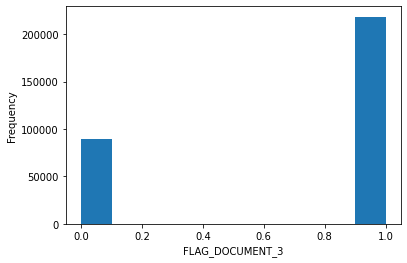

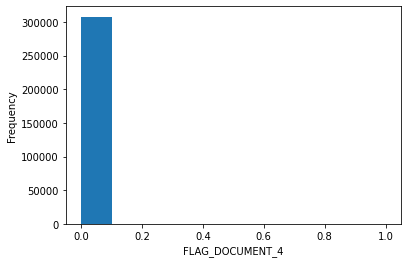

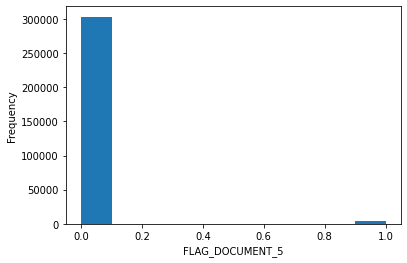

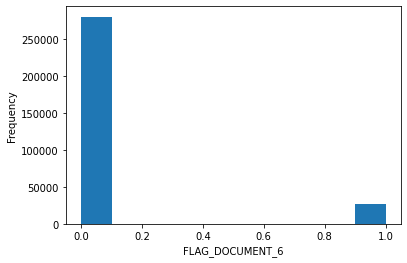

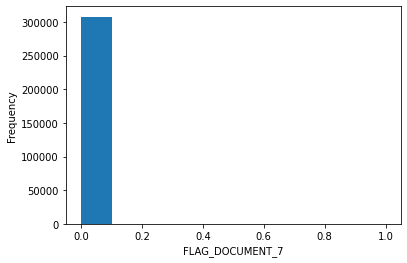

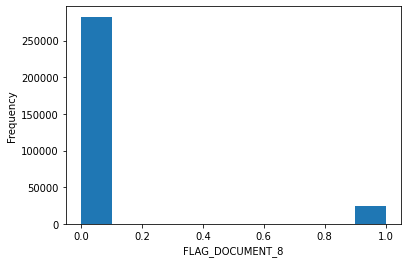

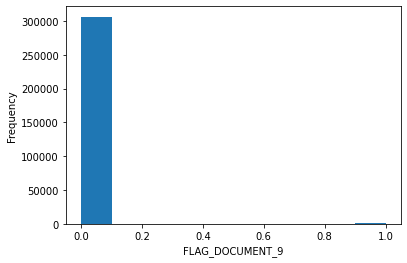

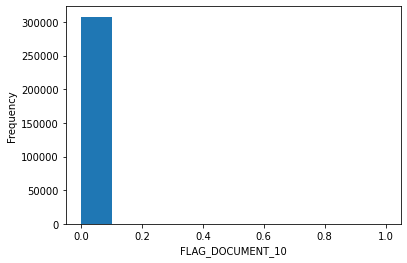

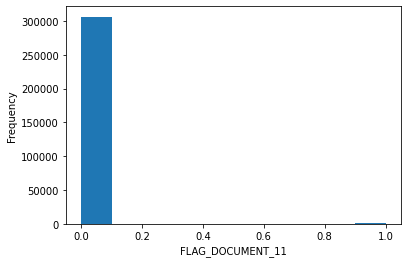

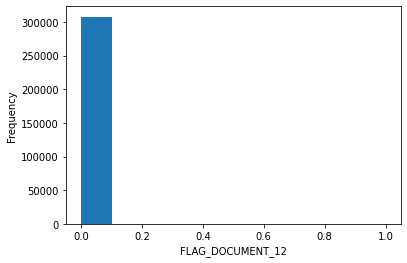

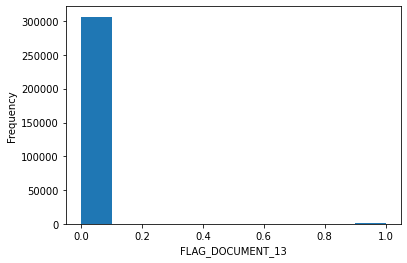

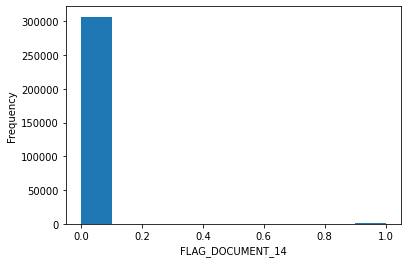

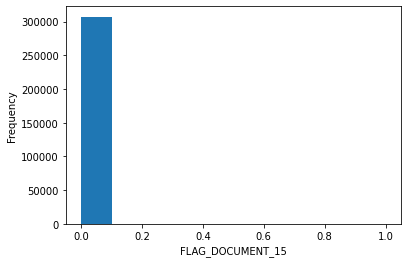

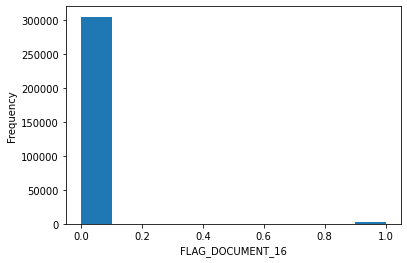

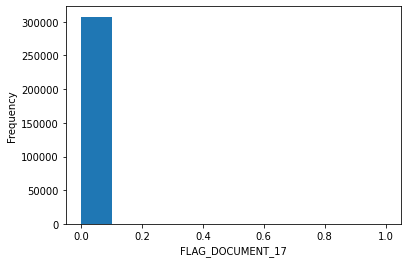

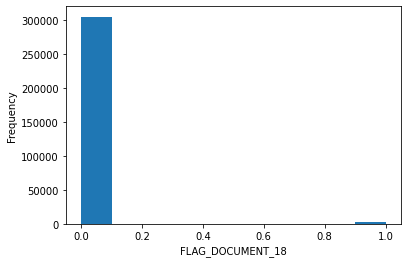

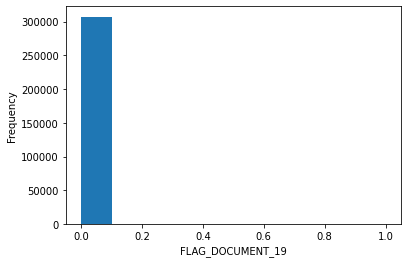

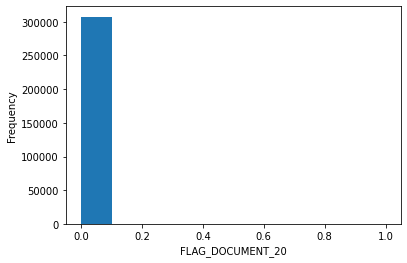

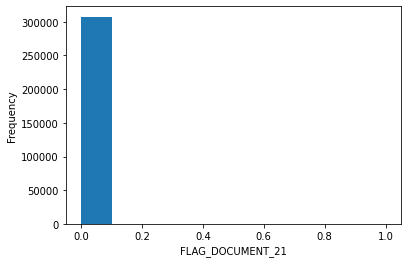

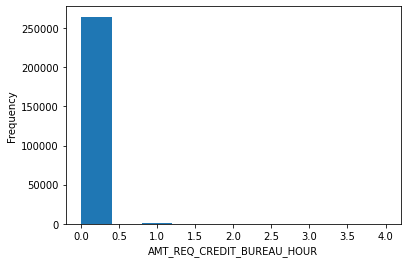

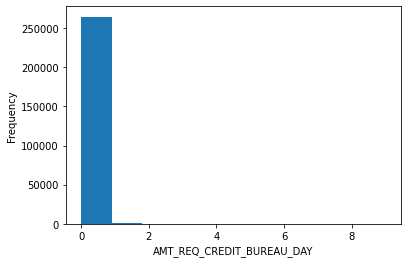

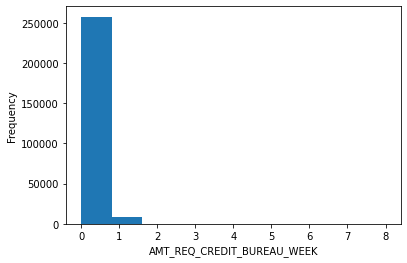

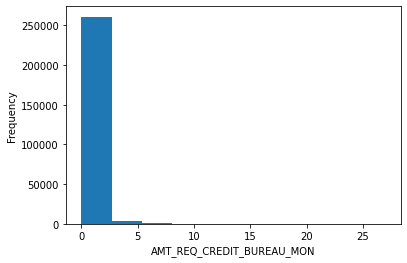

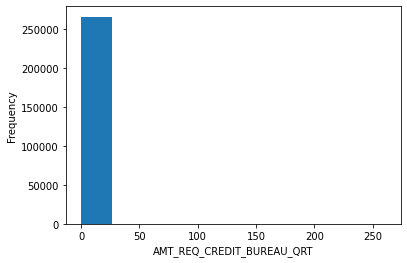

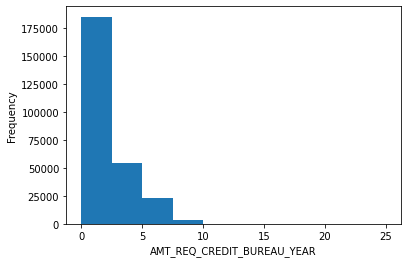

In [ ]:
for i in df_app[ls_nc1]:
  df_app[i].plot(kind='hist', label ='i')
  plt.xlabel(i)
  plt.show()

1127

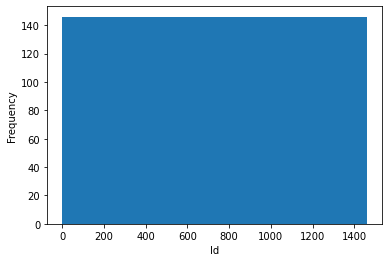

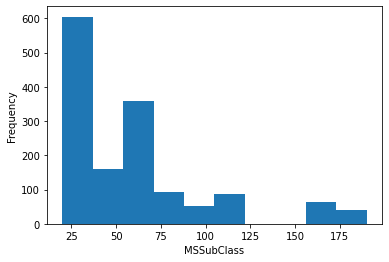

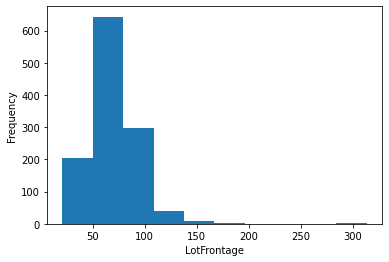

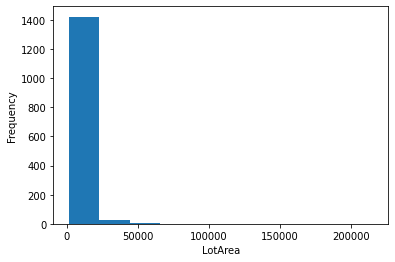

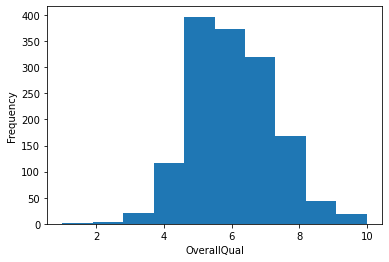

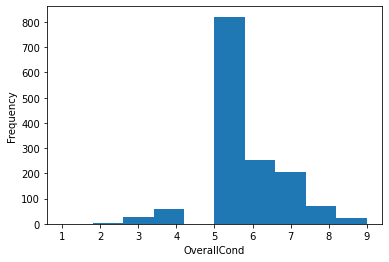

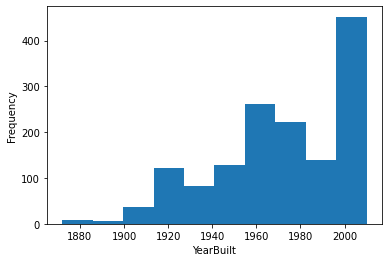

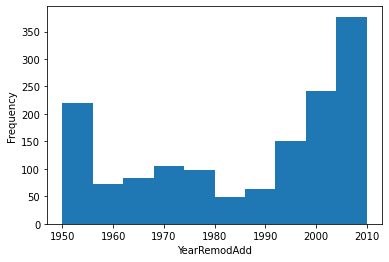

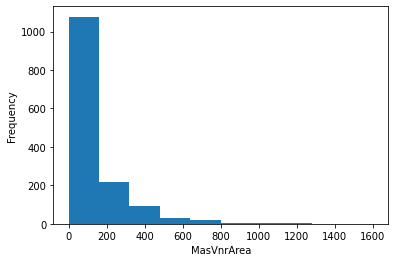

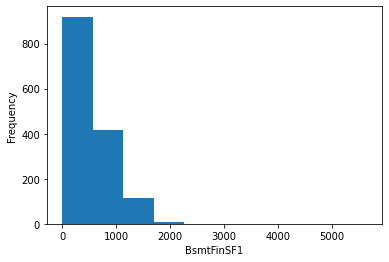

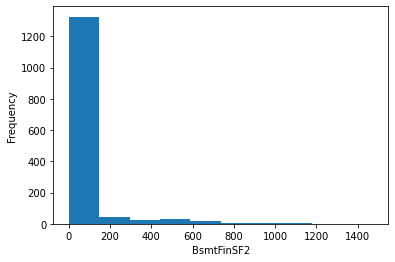

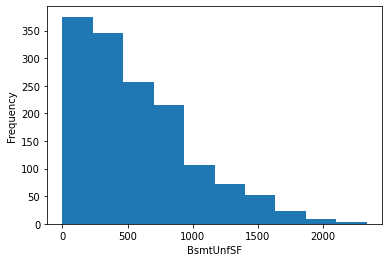

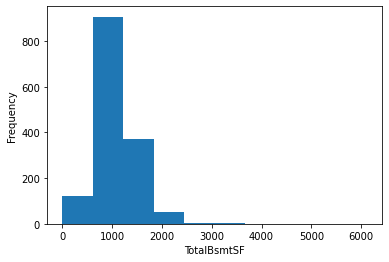

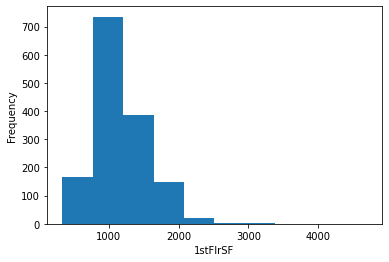

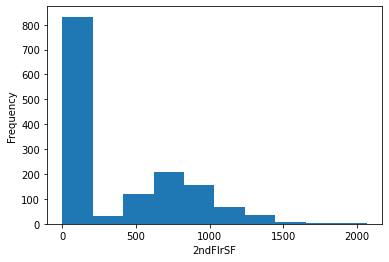

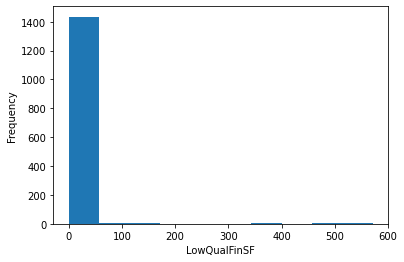

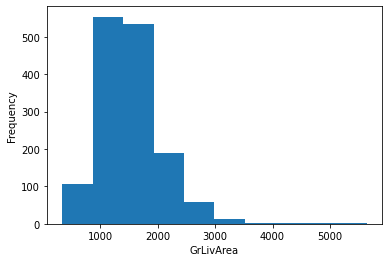

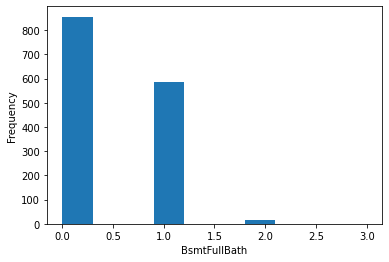

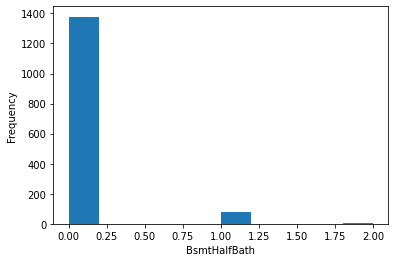

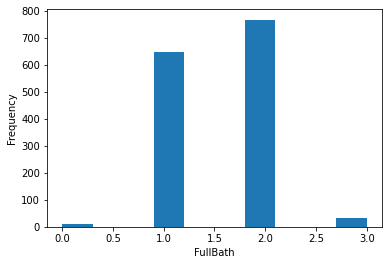

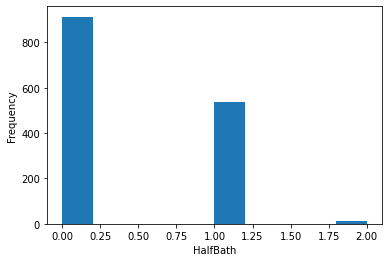

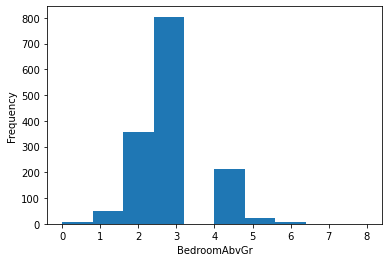

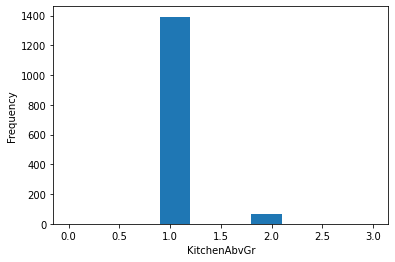

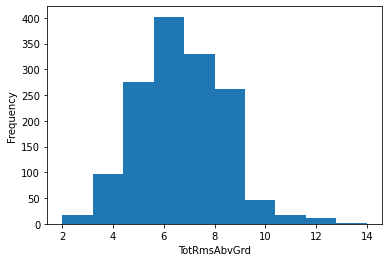

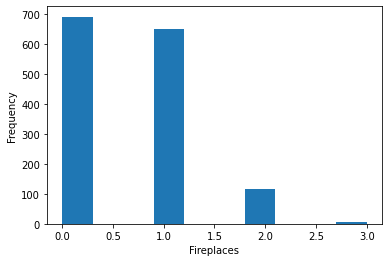

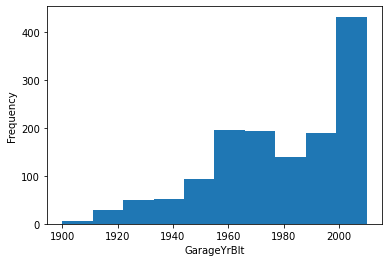

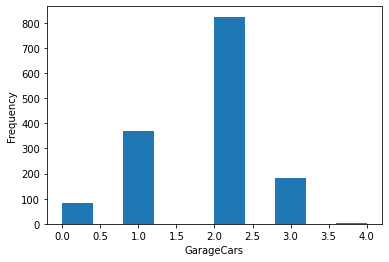

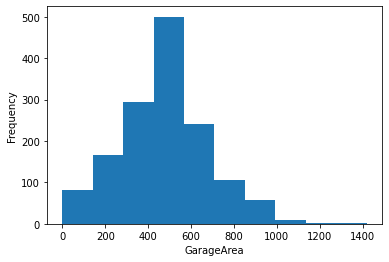

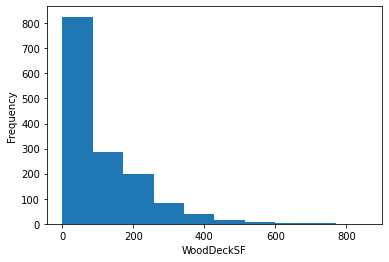

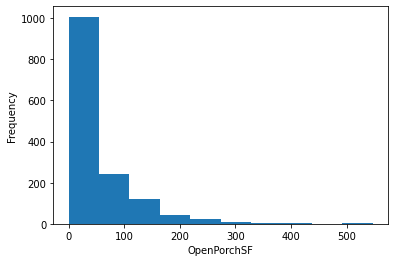

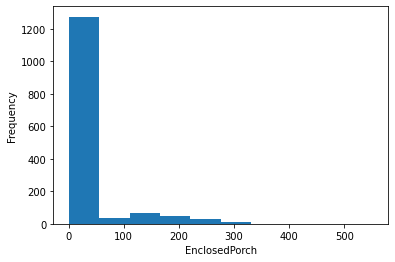

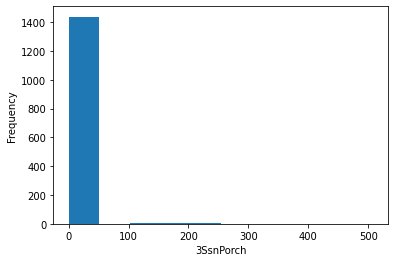

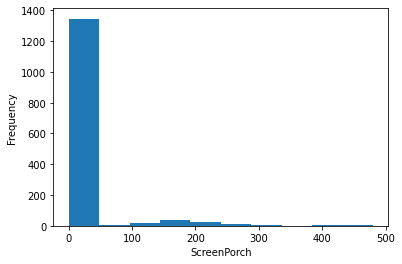

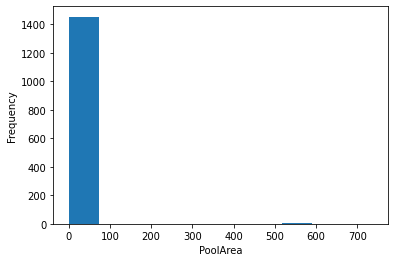

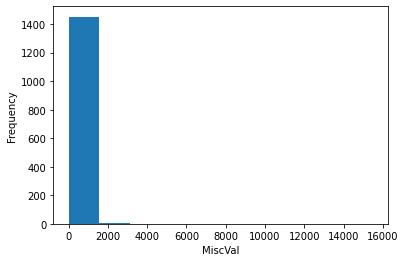

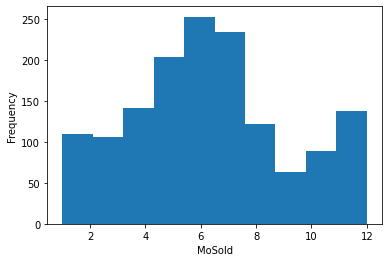

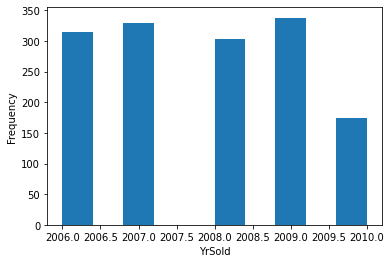

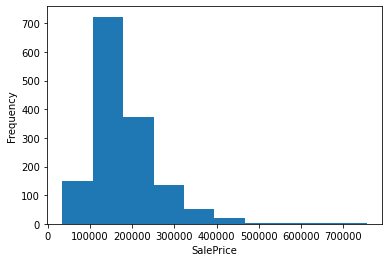

In [ ]:
import matplotlib.pyplot as plt
for i in df_house_tr[ls_nc2]:
  df_house_tr[i].plot(kind='hist', label ='i')
  plt.xlabel(i)
  plt.show()


# 【練習 9: Application df.plot 做kind= default, 'hist', 'kde', bar, scatter 】
# 對 "AMT_GOODS_PRICE" 進行　kind= default, 'hist', 'kde', bar, 
# 對 "AMT_GOODS_PRICE" 與 "AMT_ANNUITY" 作 scatter
 

1127

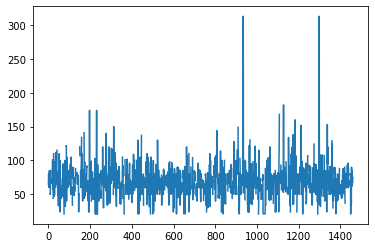

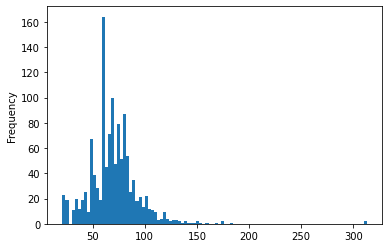

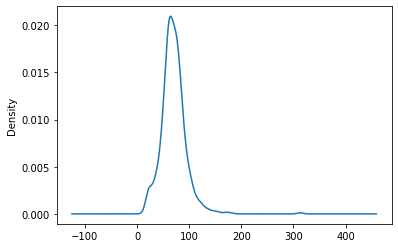

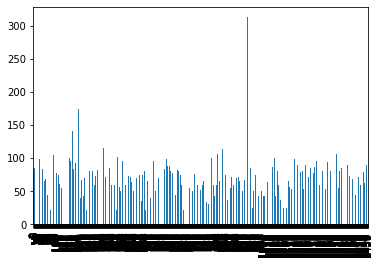

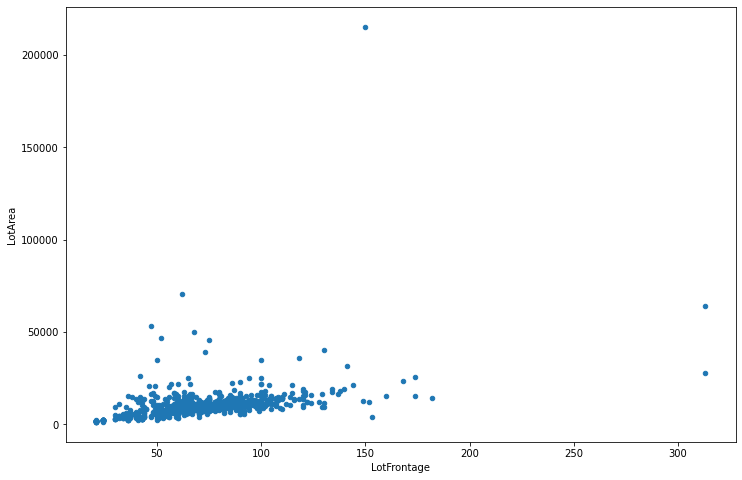

In [ ]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_house_tr["LotFrontage"].plot()
plt.show()
df_house_tr["LotFrontage"].plot(kind='hist', bins = 100)
plt.show()
df_house_tr["LotFrontage"].plot(kind='kde')
plt.show()
df_house_tr["LotFrontage"].plot(kind='bar')
plt.show()
df_house_tr.plot(kind='scatter', x ="LotFrontage", y = "LotArea", figsize=(12,8))

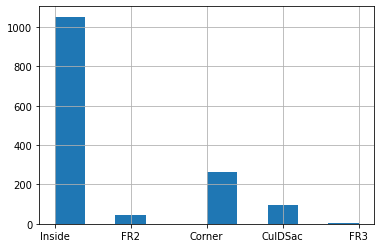

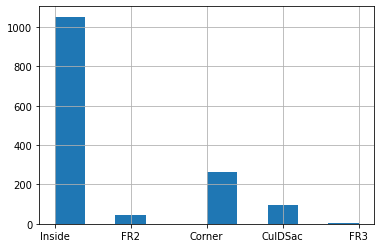

In [ ]:
df_house_tr['LotConfig'].unique()
df_house_tr['LotConfig'].hist()
plt.show()
plt.hist(df_house_tr.LotConfig)
plt.grid('on')

# 【練習 10: Application .describe()異常值觀察】
# 異常值觀察: 觀察 application_train.csv 中的 'DAYS_BIRTH','DAYS_EMPLOYED',

1129

In [ ]:
#print((df_app.DAYS_BIRTH/(-365)).describe())
print((df_app.DAYS_EMPLOYED/(-365)).describe(), '\n\n')
print((df_app.DAYS_EMPLOYED/(-365)).describe()['min'])


count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64 


-1000.6657534246575


In [ ]:
print((df_app.DAYS_BIRTH/(-365)).describe(), '\n')
print((df_app.DAYS_EMPLOYED/(-365)).describe())
# DAYS_EMPLOYED min = (-1000)*(-365) 很奇怪 

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64 

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64


# 【練習 11: Application 異常值觀察: 以 hist or box】 
異常值觀察: 以 hist or box 觀察 application_train.csv

AMT_INCOME_TOTAL


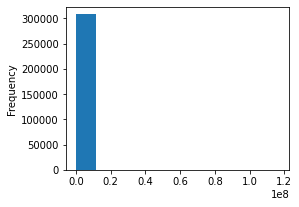

AMT_CREDIT


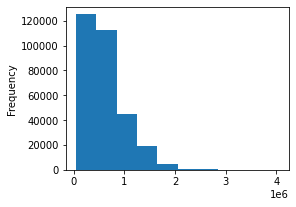

AMT_ANNUITY


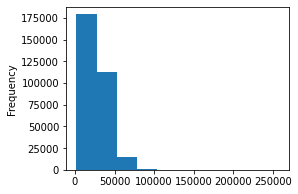

AMT_GOODS_PRICE


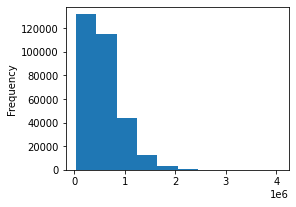

REGION_POPULATION_RELATIVE


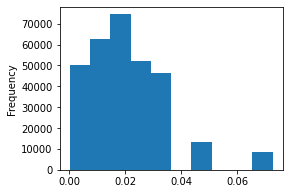

DAYS_REGISTRATION


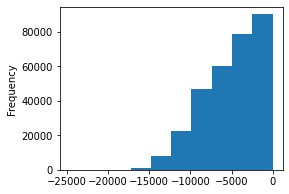

OWN_CAR_AGE


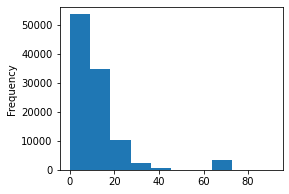

CNT_FAM_MEMBERS


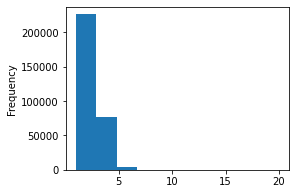

EXT_SOURCE_1


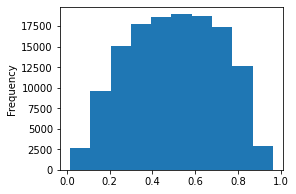

EXT_SOURCE_2


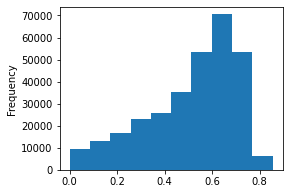

EXT_SOURCE_3


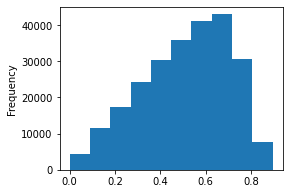

APARTMENTS_AVG


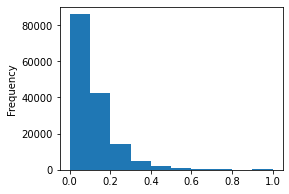

BASEMENTAREA_AVG


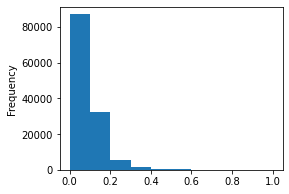

YEARS_BEGINEXPLUATATION_AVG


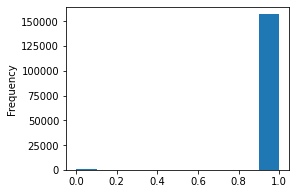

YEARS_BUILD_AVG


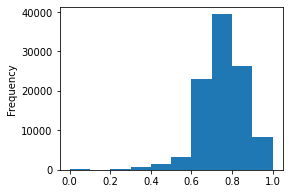

COMMONAREA_AVG


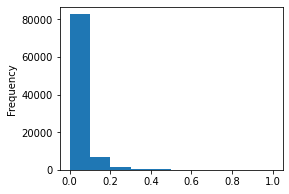

ELEVATORS_AVG


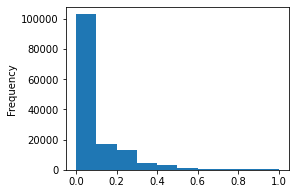

ENTRANCES_AVG


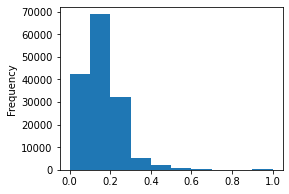

FLOORSMAX_AVG


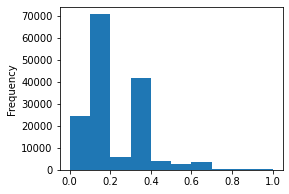

FLOORSMIN_AVG


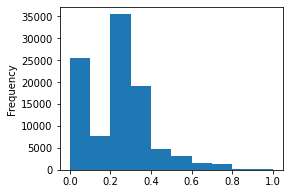

LANDAREA_AVG


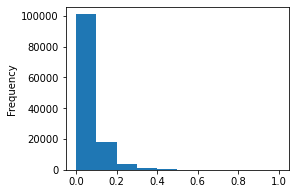

LIVINGAPARTMENTS_AVG


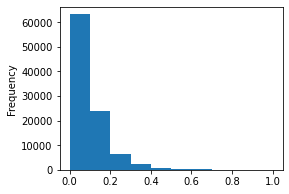

LIVINGAREA_AVG


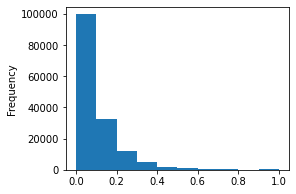

NONLIVINGAPARTMENTS_AVG


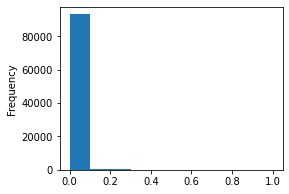

NONLIVINGAREA_AVG


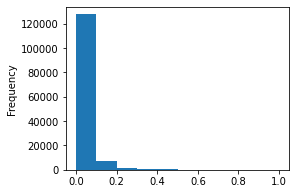

APARTMENTS_MODE


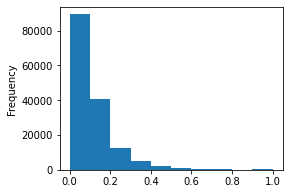

BASEMENTAREA_MODE


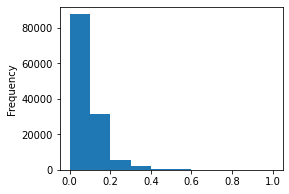

YEARS_BEGINEXPLUATATION_MODE


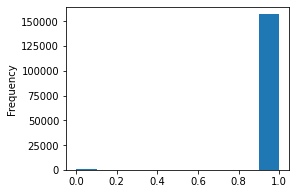

YEARS_BUILD_MODE


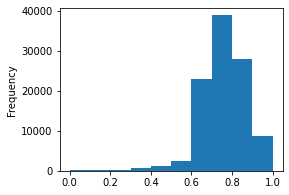

COMMONAREA_MODE


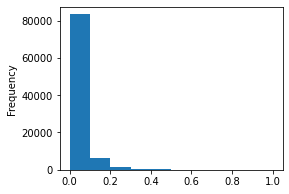

ELEVATORS_MODE


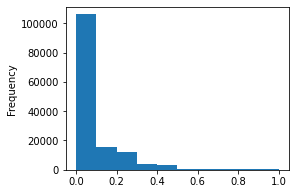

ENTRANCES_MODE


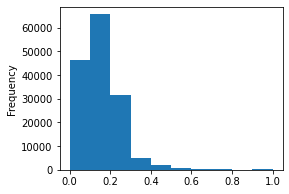

FLOORSMAX_MODE


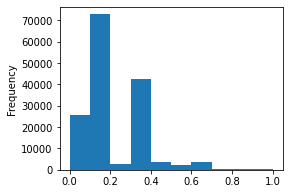

FLOORSMIN_MODE


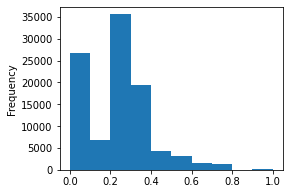

LANDAREA_MODE


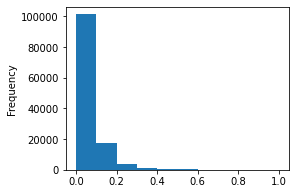

LIVINGAPARTMENTS_MODE


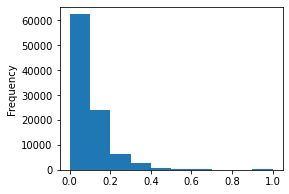

LIVINGAREA_MODE


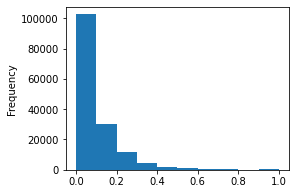

NONLIVINGAPARTMENTS_MODE


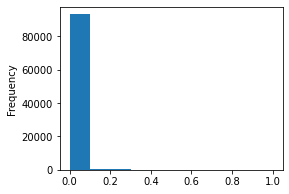

NONLIVINGAREA_MODE


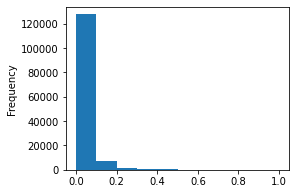

APARTMENTS_MEDI


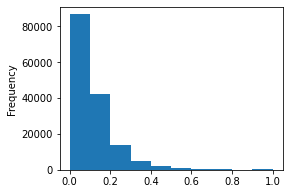

BASEMENTAREA_MEDI


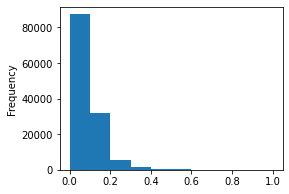

YEARS_BEGINEXPLUATATION_MEDI


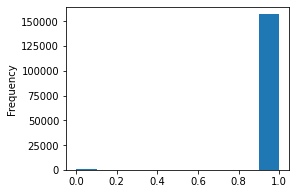

YEARS_BUILD_MEDI


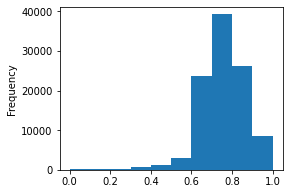

COMMONAREA_MEDI


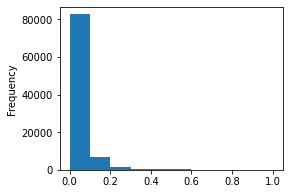

ELEVATORS_MEDI


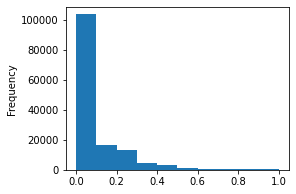

ENTRANCES_MEDI


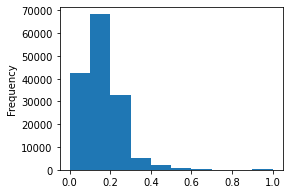

FLOORSMAX_MEDI


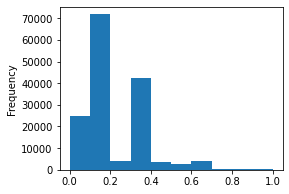

FLOORSMIN_MEDI


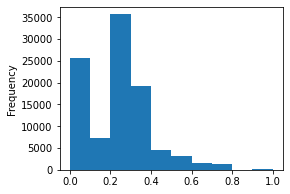

LANDAREA_MEDI


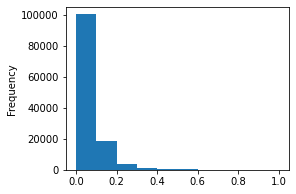

LIVINGAPARTMENTS_MEDI


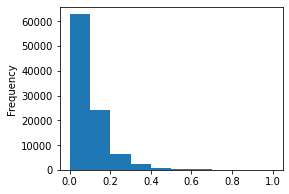

LIVINGAREA_MEDI


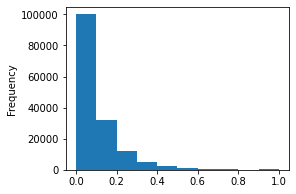

NONLIVINGAPARTMENTS_MEDI


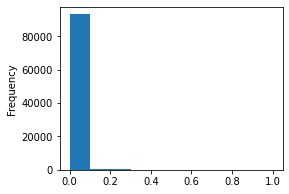

NONLIVINGAREA_MEDI


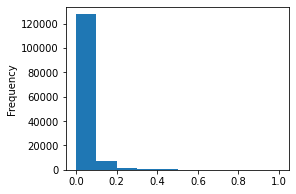

TOTALAREA_MODE


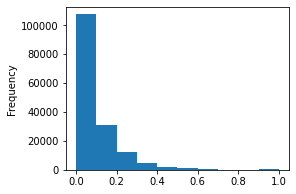

OBS_30_CNT_SOCIAL_CIRCLE


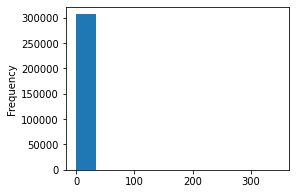

DEF_30_CNT_SOCIAL_CIRCLE


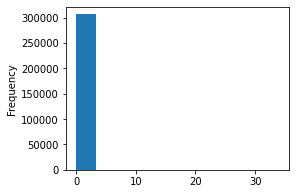

OBS_60_CNT_SOCIAL_CIRCLE


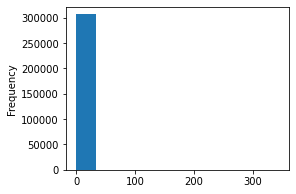

DEF_60_CNT_SOCIAL_CIRCLE


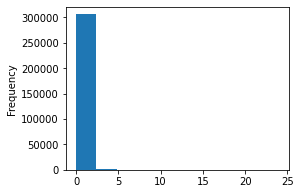

DAYS_LAST_PHONE_CHANGE


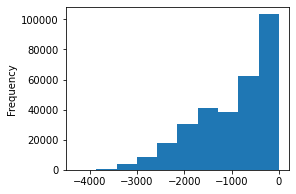

AMT_REQ_CREDIT_BUREAU_HOUR


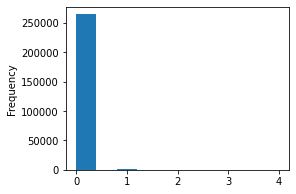

AMT_REQ_CREDIT_BUREAU_DAY


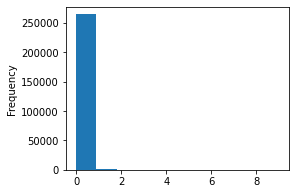

AMT_REQ_CREDIT_BUREAU_WEEK


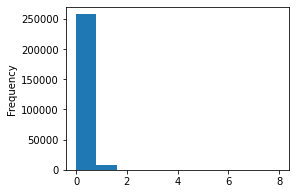

AMT_REQ_CREDIT_BUREAU_MON


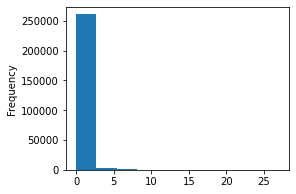

AMT_REQ_CREDIT_BUREAU_QRT


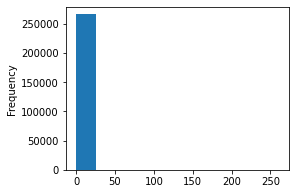

AMT_REQ_CREDIT_BUREAU_YEAR


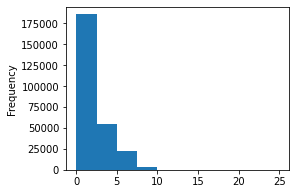

SK_ID_CURR


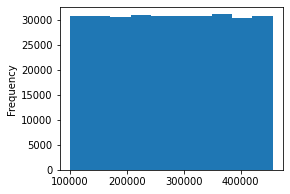

TARGET


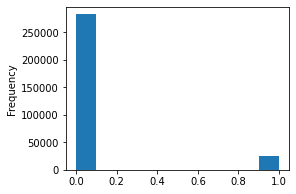

CNT_CHILDREN


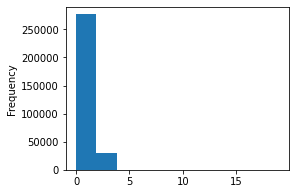

DAYS_BIRTH


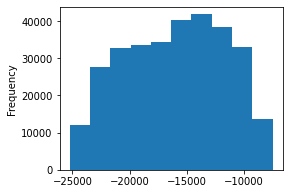

DAYS_EMPLOYED


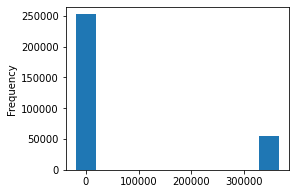

DAYS_ID_PUBLISH


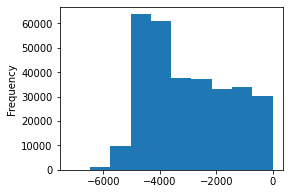

FLAG_MOBIL


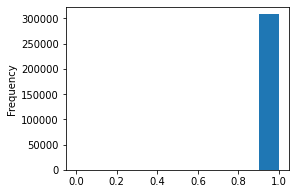

FLAG_EMP_PHONE


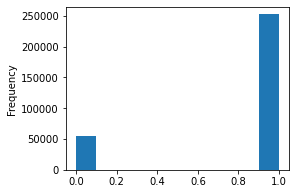

FLAG_WORK_PHONE


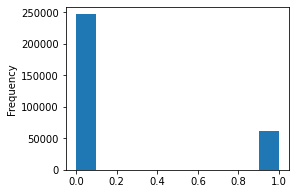

FLAG_CONT_MOBILE


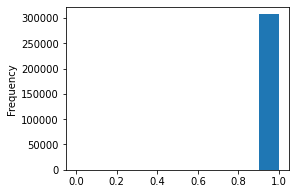

FLAG_PHONE


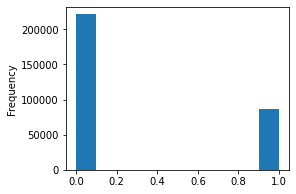

FLAG_EMAIL


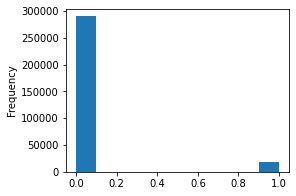

REGION_RATING_CLIENT


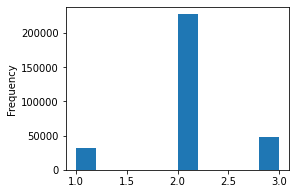

REGION_RATING_CLIENT_W_CITY


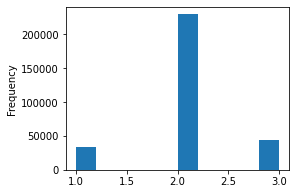

HOUR_APPR_PROCESS_START


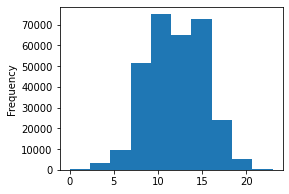

REG_REGION_NOT_LIVE_REGION


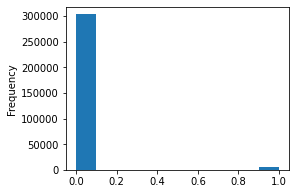

REG_REGION_NOT_WORK_REGION


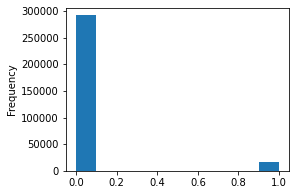

LIVE_REGION_NOT_WORK_REGION


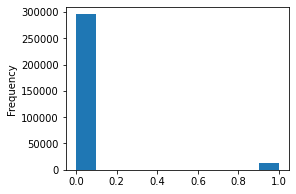

REG_CITY_NOT_LIVE_CITY


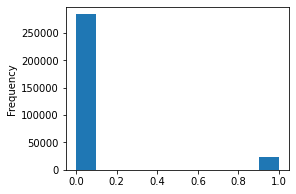

REG_CITY_NOT_WORK_CITY


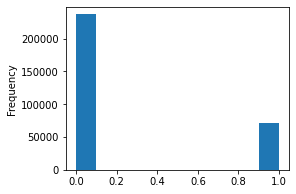

LIVE_CITY_NOT_WORK_CITY


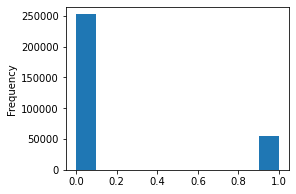

FLAG_DOCUMENT_2


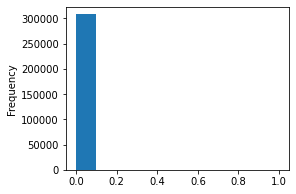

FLAG_DOCUMENT_3


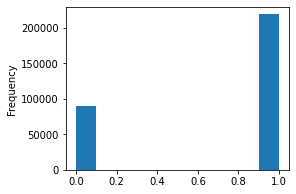

FLAG_DOCUMENT_4


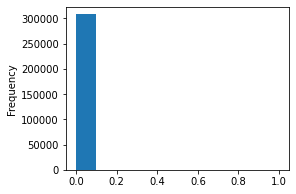

FLAG_DOCUMENT_5


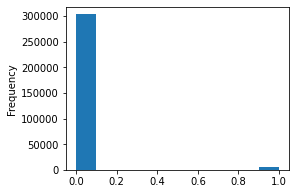

FLAG_DOCUMENT_6


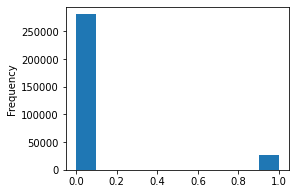

FLAG_DOCUMENT_7


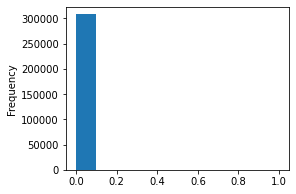

FLAG_DOCUMENT_8


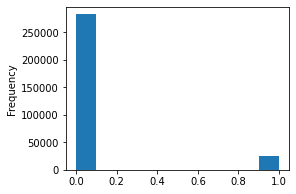

FLAG_DOCUMENT_9


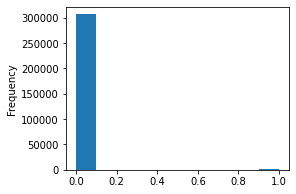

FLAG_DOCUMENT_10


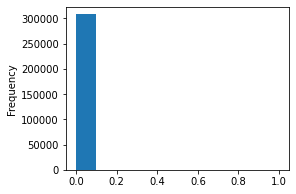

FLAG_DOCUMENT_11


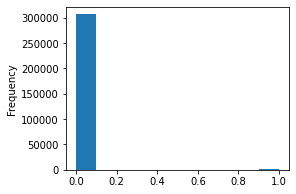

FLAG_DOCUMENT_12


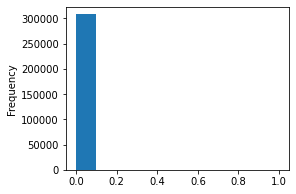

FLAG_DOCUMENT_13


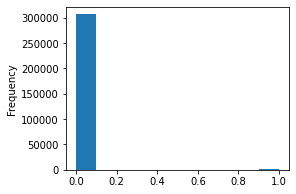

FLAG_DOCUMENT_14


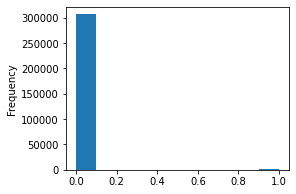

FLAG_DOCUMENT_15


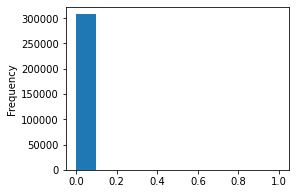

FLAG_DOCUMENT_16


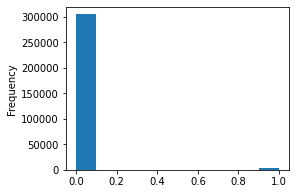

FLAG_DOCUMENT_17


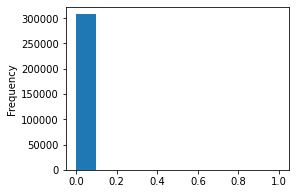

FLAG_DOCUMENT_18


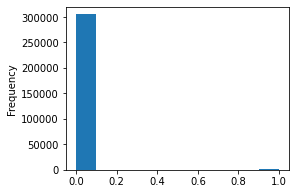

FLAG_DOCUMENT_19


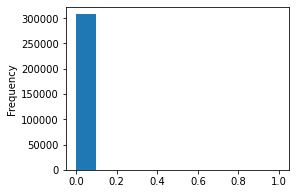

FLAG_DOCUMENT_20


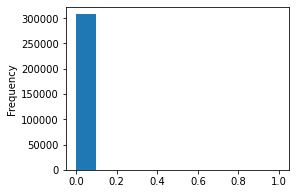

FLAG_DOCUMENT_21


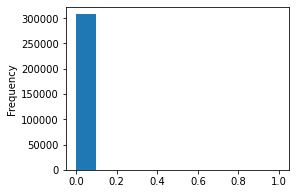

In [ ]:
for i in df_app[ls_nc1]:
  print(i)
  df_app[i].plot(kind = 'hist', figsize=(4,3))
  plt.show()

In [ ]:
df_app[ls_nc1[3]].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#【練習 12: Application 異常值觀察】 
觀察 application_train.csv 這三項
- AMT_INCOME_TOTAL # 集中在 0~ 0.2, 但是 x_axis range ~ 10^8
- REGION_POPULATION_RELATIVE
- OBS_60_CNT_SOCIAL_CIRCLE




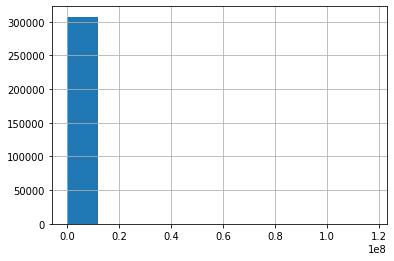

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


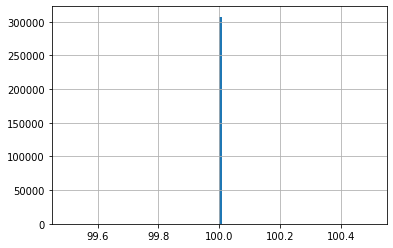

In [ ]:
df_app.AMT_INCOME_TOTAL.hist()
# most of all data are located at 0~0.2, but max is at 1.2*10^8
plt.show()
print(df_app.AMT_INCOME_TOTAL.describe())
df_app.AMT_INCOME_TOTAL.clip(98,100).hist(bins=100)

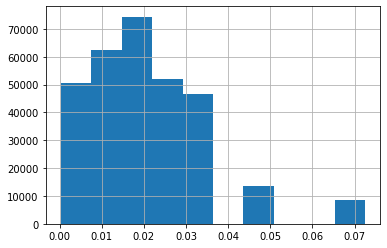

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


In [ ]:
df_app.REGION_POPULATION_RELATIVE.hist()
# max 跑太遠
plt.show()
print(df_app.REGION_POPULATION_RELATIVE.describe())
#df_app.REGION_POPULATION_RELATIVE.clip(98,100).hist(bins=100)

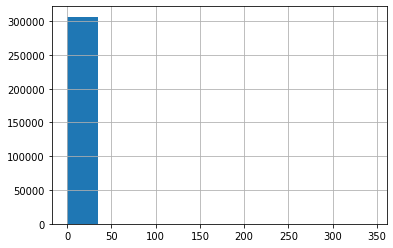

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [ ]:
df_app.OBS_60_CNT_SOCIAL_CIRCLE.hist()
# max 跑太遠
plt.show()
print(df_app.OBS_60_CNT_SOCIAL_CIRCLE.describe())
#df_app.REGION_POPULATION_RELATIVE.clip(98,100).hist(bins=100)

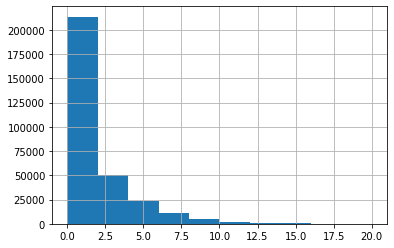

In [ ]:
loc_a = (df_app['OBS_60_CNT_SOCIAL_CIRCLE']<=20)
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'
df_app.loc[loc_a, loc_b].hist()
plt.show()

# 【練習 13: Application ECF 如果衝好快】
ECF 如果一下子就衝上去的觀察: 研究這段 code, 然後對 
- ## 'REGION_POPULATION_RELATIVE' , 
- ## 'OBS_60_CNT_SOCIAL_CIRCLE'

# 做類似處理
- 請特別留意: 這一欄所有相同值做數量統計，排定數量順序，然後累加工作。。

```
cdf = df_app['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()
```





```
import numpy as np
# 最大值離平均與中位數很遠
print(df_app['AMT_INCOME_TOTAL'].describe())
# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = df_app['AMT_INCOME_TOTAL'].value_counts().sort_index().cumsum()
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
```



count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


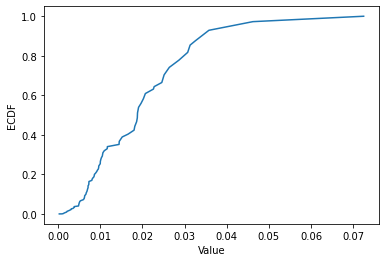

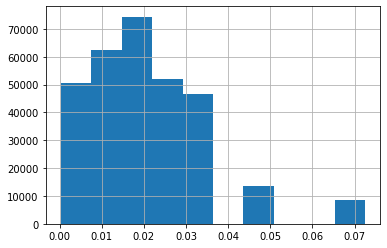

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [ ]:
# 最大值落在分布之外
print(df_app['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = df_app['REGION_POPULATION_RELATIVE'].value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

df_app['REGION_POPULATION_RELATIVE'].hist()
plt.show()

df_app['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


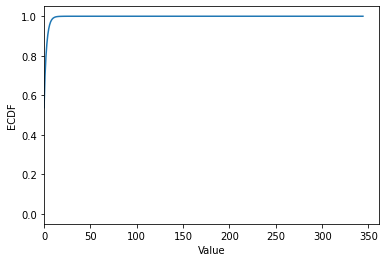

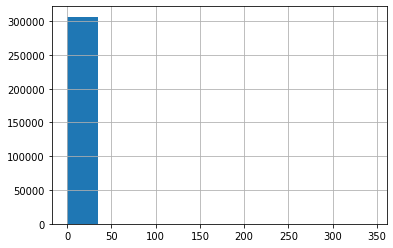

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [ ]:
# 最大值落在分布之外
print(df_app['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""

cdf = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
df_app['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(df_app['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

# 【練習 14: Application 熟悉 seaborn.regplot、log1p】
  - 熟悉 seaborn.regplot 
  - log1p 看出線性關係練習十四: 
  - 對 application_train.csv 中的 '1stFlrSF' 進行 regression plot 
  - hint: seaborn
  - 請加入這段 Code, 並且寫出解釋


```
# 顯示 1stFlrSF 與目標值的散佈圖
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

MMEncoder = MinMaxScaler()
train_Y = np.log1p(df_house_tr['SalePrice'])
train_num = train_Y.shape[0]

df = df_house_tr[ls_nc2]
df = df.fillna(-1)

```



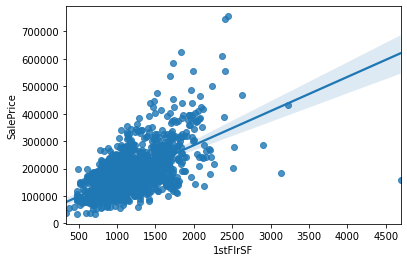

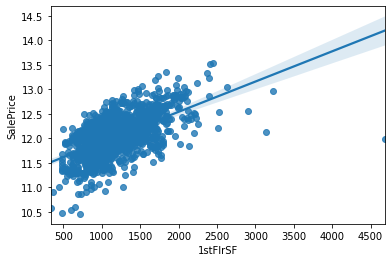

0.9390154086660474

In [ ]:
# 顯示 1stFlrSF 與目標值的散佈圖
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

MMEncoder = MinMaxScaler()
train_Y = np.log1p(df_house_tr['SalePrice'])
train_num = train_Y.shape[0]

df = df_house_tr[ls_nc2]
df = df.fillna(-1)


import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df_house_tr['1stFlrSF'][:train_num], y=df_house_tr['SalePrice'])
plt.show()
sns.regplot(x = df_house_tr['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

#【練習 15: Application df[條件]['row'] 的限制值方法】
觀察上一題，嘗試將 '1stFlrSF' 只保留在我們判斷的正常合理範圍內的值， 進行 regression plot
- hint: keep_indexs = (df['1stFlrSF']> 500) & (df['1stFlrSF']< 2000)
- 開始學會 day 13 
        
      某一種程式
        df[df['attribute_1']>0]['attribute_1']
        df[條件]['attribute_1']
        df['attribute_1']>0 : 條件，判斷式，該 series 充滿 True, False
        df[條件] 仍是一張全二維的 dataframe
        df[條件]['attribute_1'] 該欄資料

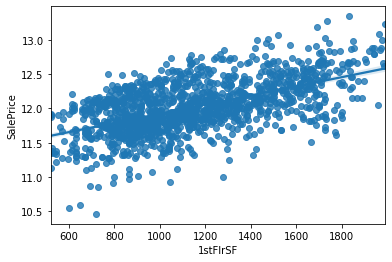

0.95038117780032

In [ ]:
# 將 1stFlrSF 限制在 500 到 2000 以內, 捨棄離群值
#keep_indexs = (df['1stFlrSF']> 500) & (df['1stFlrSF']< 2000)
df = df[(df['1stFlrSF']> 500) & (df['1stFlrSF']< 2000)]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# 【練習 16: Application .clip 的限制值】 觀察上一題，嘗試將 '1stFlrSF' 的值限制範圍 進行 regression plot
- hint: .clip(min, max)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.95038117780032

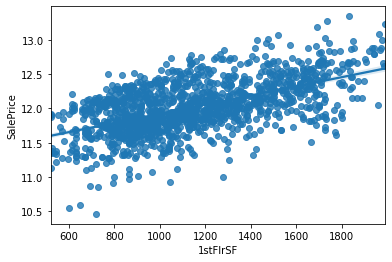

In [ ]:
df_clip = df['1stFlrSF'].clip(200, 2200) 
sns.regplot(df_clip, train_Y)



# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# BELOW: REFRENCE

# 到目前為止，我們作了
1. 基本觀察 3 df.head, df.info + df.describe, df.shape
2. check dtype 然後對 object columns 進行 encoding
3. 繼續作 dtype 工作，分成三個 list (columns group)
4. 對 columns 作 統計量化 描述，與一些圖
```
計算集中趨勢   
平均值 Mean
中位數 Median
眾數 Mode
計算資料分散程度
最小值 Min
最大值 Max
範圍 Range
四分位差 Quartiles
變異數 Variance
標準差 Standard deviation
```
```
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
df_train["LotFrontage"].plot()
plt.show()
df_train["LotFrontage"].plot(kind='hist', bins = 100)
plt.show()
df_train["LotFrontage"].plot(kind='kde')
plt.show()
df_train["LotFrontage"].plot(kind='bar')
plt.show()
df_train.plot(kind='scatter', x ="LotFrontage", y = "LotArea", figsize=(12,8))
```
# 接下來, 我們來看看 outlier



In [ ]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select =[np.dtype('int64'), np.dtype('float64')]


numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(len(numeric_columns))


106


In [ ]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
#print("Numbers of remain columns" % len(numeric_columns))
print(f"Numbers of remain columns {len(numeric_columns)}")

Numbers of remain columns 73


outliers 處理方式是 刪除他! 或填 -1, 0, mean medimum 等
